# Exploratory Data Analysis

## 1. Importing Libraries

In [1]:
import pandas as pd        # For data manipulation and analysis
import numpy as np         # For numerical computations
import matplotlib.pyplot as plt  # For basic plotting functionalities
import seaborn as sns      # For advanced visualizations

sns.set_style("whitegrid")

C:\Users\dharm\AppData\Local\Temp\ipykernel_20108\1923964427.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd        # For data manipulation and analysis


## 2. Loading the Data

In [2]:
# Load the dataset
data = pd.read_csv('C:\\Users\\dharm\\Downloads\\KaggleV2-May-2016.csv\\KaggleV2-May-2016.csv')

# Display the first few rows
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## 3. Initial Inspection

In [3]:
# Check the shape of the dataset (rows, columns)
print("Shape of the dataset:", data.shape)

# Get an overview of the data (first and last few rows)
print("First five rows:")
print(data.head())
print("Last five rows:")
print(data.tail())

# Check for data types and non-null counts
print("Data types and non-null counts:")
print(data.info())

# Check the data types
print("Data types of each column:")
print(data.dtypes)

Shape of the dataset: (110527, 14)
First five rows:
      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0           

## 4. Data Cleaning

#### Checking for Missing Values

In [4]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


#### Checking for Duplicate Rows

In [5]:
# Check for duplicates
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Drop duplicates if any (if needed)
data = data.drop_duplicates()

Number of duplicate rows: 0


#### Converting Date Columns to Datetime Format

In [6]:
# Convert date columns to datetime format
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

# Extract new features from datetime columns (e.g., day of the week, month)
data['ScheduledDayOfWeek'] = data['ScheduledDay'].dt.day_name()
data['AppointmentDayOfWeek'] = data['AppointmentDay'].dt.day_name()
data['DaysBetween'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

## 5. Univariate Analysis

#### Descriptive Statistics for Numerical Data

In [7]:
# Summary statistics
print("Summary statistics for numerical data:")
print(data.describe())

Summary statistics for numerical data:
          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%

#### Visualizing the Age Distribution

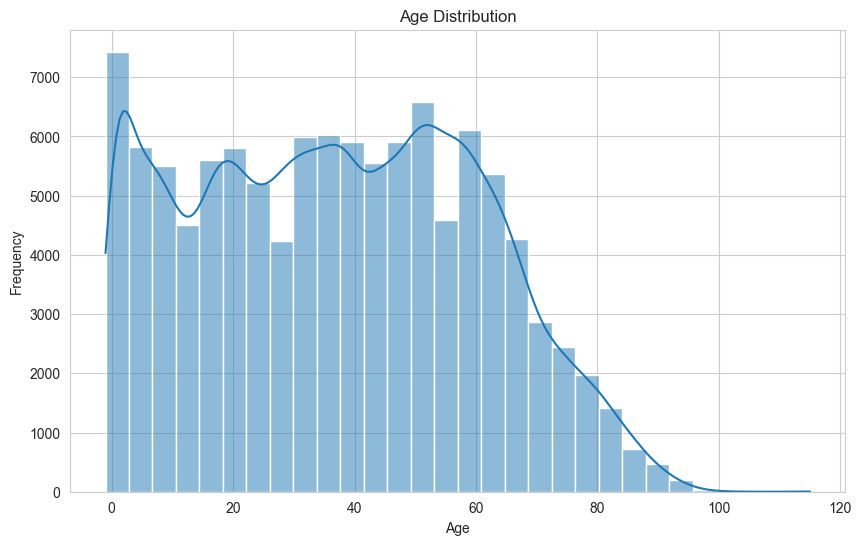

In [8]:
# Plotting age distribution with a histogram
plt.figure(figsize=(10,6))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#### Examining the Proportion of No-shows

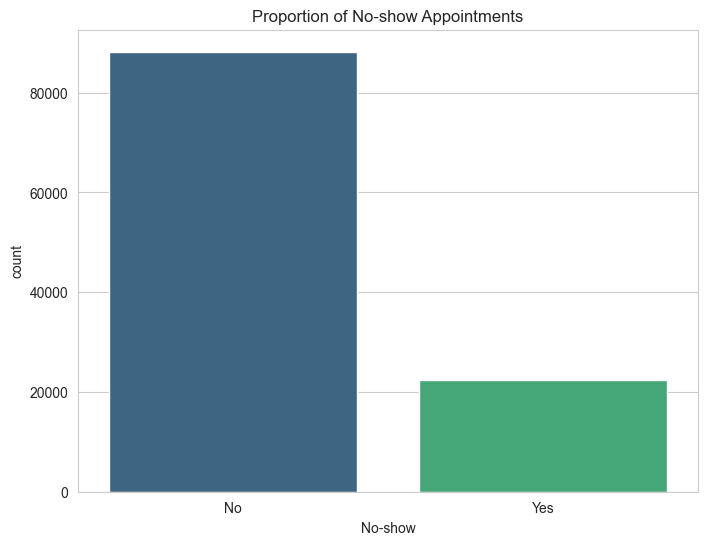

In [9]:
# Proportion of No-shows
plt.figure(figsize=(8,6))
sns.countplot(x='No-show', data=data, hue='No-show', palette='viridis', dodge=False)
plt.title("Proportion of No-show Appointments")
plt.legend([],[], frameon=False)
plt.show()

## 6. Bivariate Analysis

#### Analyzing the Relationship Between Age and No-show Status

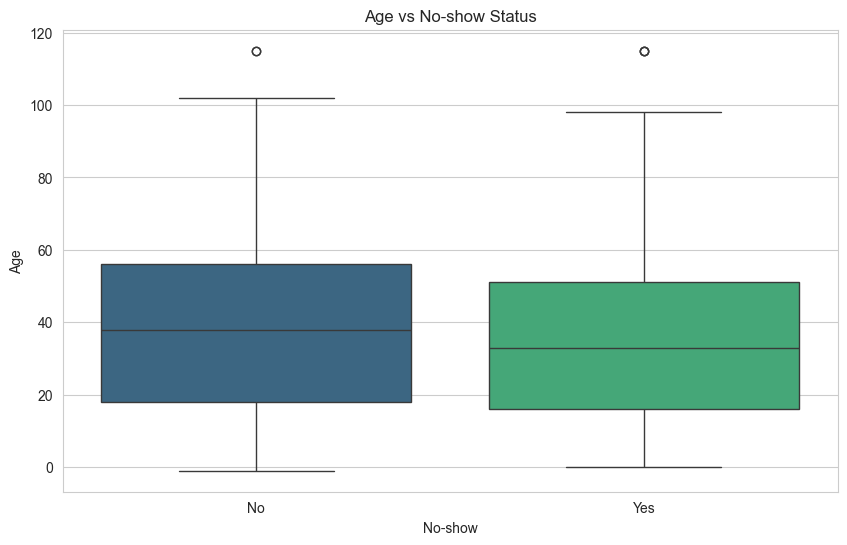

In [10]:
# Box plot of age by No-show
plt.figure(figsize=(10,6))
sns.boxplot(x='No-show', y='Age', hue='No-show', data=data, palette='viridis', dodge=False)
plt.title("Age vs No-show Status")
plt.xlabel("No-show")
plt.ylabel("Age")
plt.legend([],[], frameon=False)
plt.show()

#### Examining the Relationship Between Days Waited and No-show Rate

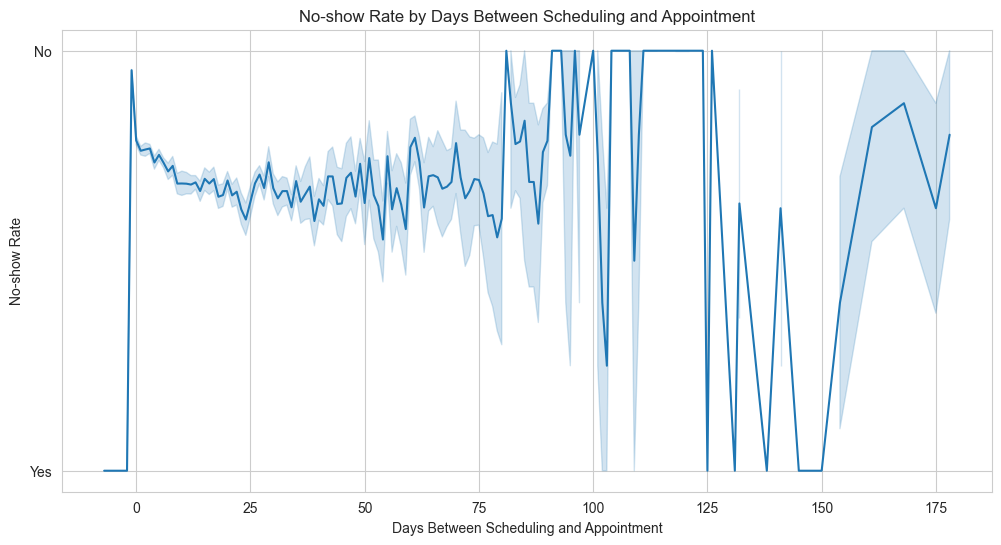

In [11]:
plt.figure(figsize=(12,6))
sns.lineplot(x=data['DaysBetween'], y=data['No-show'], estimator='mean')
plt.title("No-show Rate by Days Between Scheduling and Appointment")
plt.xlabel("Days Between Scheduling and Appointment")
plt.ylabel("No-show Rate")
plt.show()

## 7. EDA - Multivariate Analysis

#### Gender Distribution by No-show Status

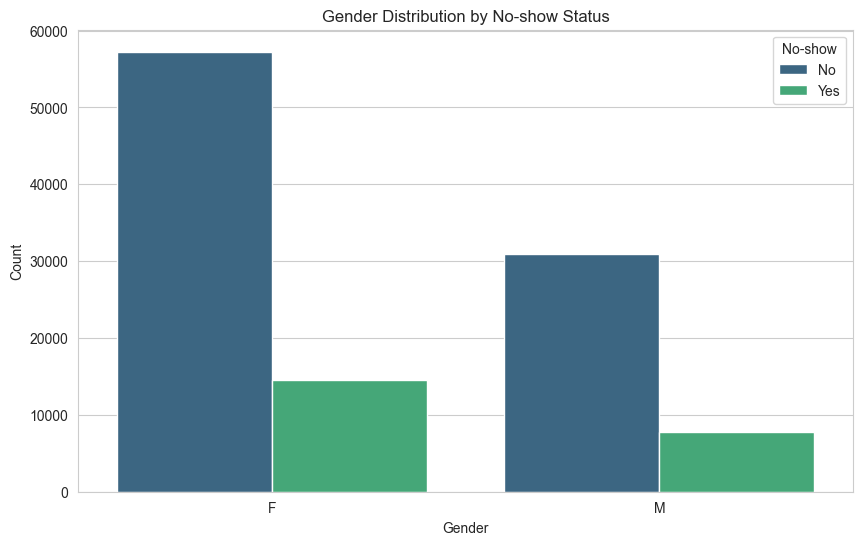

In [12]:
# Plotting the distribution of Gender by No-show status
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', hue='No-show', data=data, palette='viridis')
plt.title("Gender Distribution by No-show Status")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

#### Heatmap for Correlations

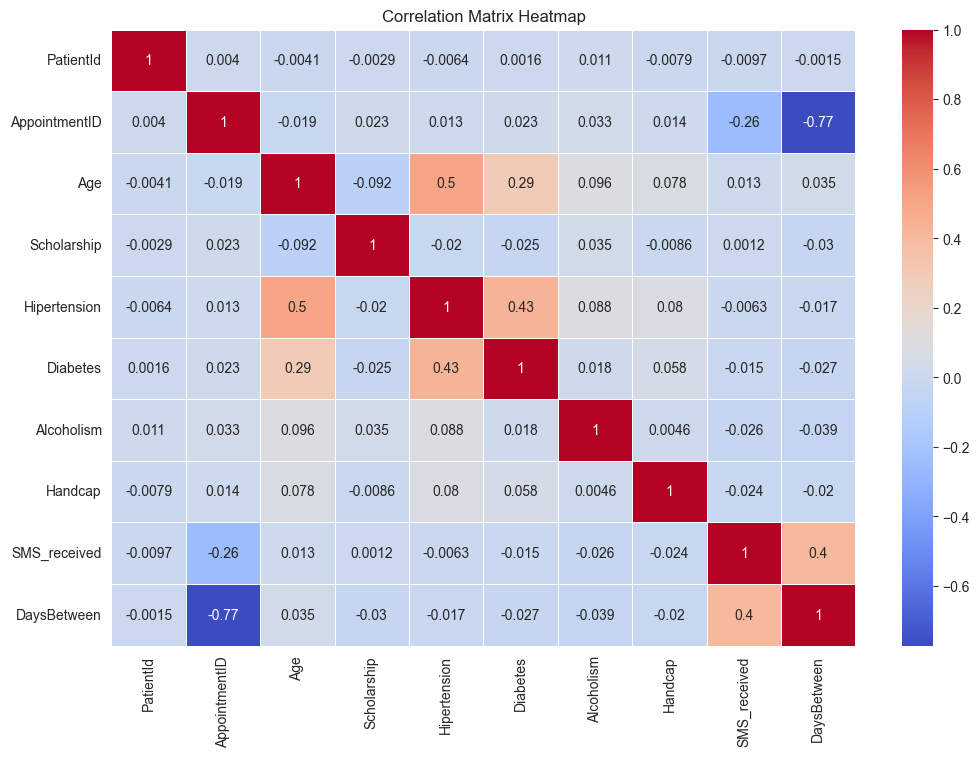

In [13]:
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()